# 이미지 변환

## 크기변환

### 입력영상 기준으로

In [4]:
import numpy as np

def scale_nogood(img, scale_x=1, scale_y=1):
    height, width = img.shape
    height_n, width_n = int(height*scale_y), int(width*scale_x)
    img_ = np.zeros((height_n, width_n), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            img_[int(y*scale_y), int(x*scale_x)] = img[y,x]

    return img_

In [7]:
import cv2
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
result = scale_nogood(img, 0.5, 0.5)
cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 다음과 같이 1.5배 늘릴 때는 선에 검은 줄이 생김
cv2.imshow('Origin', img)
cv2.imshow('Scale NG', scale_nogood(img, 1.5, 1.0))
cv2.waitKey()
cv2.destroyAllWindows()

### 출력영상 기준으로 처리

In [9]:
import numpy as np

def scale_nogood2(img, scale_x=1, scale_y=1):
    height, width = img.shape
    height_n, width_n = int(height*scale_y), int(width*scale_x)
    img_ = np.zeros((height_n, width_n), dtype=np.uint8)
    for y in range(height_n):
        for x in range(width_n):
            img_[y,x] = img[int(y/scale_y), int(x/scale_x)]
    return img_    

In [10]:
cv2.imshow('Origin', img)
cv2.imshow('Scale NG', scale_nogood2(img, 1.5, 1.0))
cv2.waitKey()
cv2.destroyAllWindows()

### 최근방법

In [11]:
import numpy as np

def scale_nearest(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_=np.zeros((int(height*scale_y), int(width*scale_x)),
                 dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            try:
                img_[y,x] = img[round(y/scale_y), round(x/scale_x)]
            except:
                pass
    return img_

In [13]:
import cv2

lena_roi = cv2.imread('images/lena_roi.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('images/Lena ROI', lena_roi)
cv2.imshow('images/Scale Nearest', scale_nearest(lena_roi,3,3))
cv2.waitKey()
cv2.destroyAllWindows()

### 선형방법

In [15]:
import numpy as np

def scale_bilinear(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)),
                   dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            q=x/scale_x -int(x/scale_x)
            p=y/scale_y-int(y/scale_y)
            try:
                X = int(x/scale_x)
                Y = int(y/scale_y)
                value = (1-p)*(1-q)*img[Y,X] + p*(1-q)*img[Y+1,X] + \
                (1-p)*q*img[Y,X+1] + p*q*img[Y+1,X+1]
                if value > 255:
                    img_[y, x] = 255
                else:
                    img_[y, x] = int(value)
            except:
                pass
    return img_

In [16]:
lena_roi = cv2.imread("images/lena_roi.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('images/Lena ROI', lena_roi)
cv2.imshow('images/Scale Nearest', scale_bilinear(lena_roi, 3, 3))
cv2.waitKey()
cv2.destroyAllWindows()

### maxpool로 크기조절

In [18]:
import numpy as np

def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2),int(width/2)), dtype=np.uint8)
    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try :
                img_[y,x] = np.max(img[2*y:2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_

In [20]:
import cv2

img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('images/Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('images/Max Pooling', maxpool2d(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
import cv2

img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('images/Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('images/Max Pooling', maxpool2d(img))
cv2.waitKey()
cv2.destroyAllWindows()

### resize사용하기

In [ ]:
img = cv2.imread("images/resize_origin_5.png")
cv2.imwrite("resize-5to100_nearest.png",
cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_NEAREST))
cv2.imwrite("resize-5to100_linear.png",cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_LINEAR))
cv2.imwrite("resize-5to100_linear_exact.png",cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_LINEAR_EXACT))
cv2.imwrite("resize-5to100_area.png",cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_AREA))
cv2.imwrite("resize-5to100_cubic.png",cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_CUBIC))
cv2.imwrite("resize-5to100_lanczos4.png",cv2.resize(img, dsize=(100, 100),interpolation=cv2.INTER_LANCZOS4))

## 이동

In [22]:
import numpy as np

def translate(img, dist=(0,0)):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            X=x+dist[0]
            Y=y+dist[1]
            if (X<0) | (X>=width) | (Y<0) | (Y>=height):
                continue
            else:
                img_[Y,X] = img[y,x]
    return img_

In [23]:
import cv2

img = cv2.imread("images/lena.jpg")

cv2.imshow("images/Origin", img)
cv2.imshow("images/Translate", translate(img, (100, 50)))
cv2.waitKey()
cv2.destroyAllWindows()

## 회전

In [29]:
import numpy as np

def rotate(img, deg=30):
    height, width = img.shape
    img_ = np.zeros(img.shape,dtype=np.uint8)
    theta = np.pi / (180.0 /deg)
    center_x = int(width/2)
    center_y = int(height/2)
    
    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(theta)+ \
                   (y-center_y)*np.sin(theta))+center_x
            Y = int(-(x-center_x)+np.sin(theta)+ \
                   (y-center_y)*np.cos(theta))+center_y
            if (X<0) | (X>=width) | (Y<0) | (Y>=height):
                continue
            img_[Y,X] = img[y,x]
            
    for y in range(1,height-1):
        for x in range(1,width-1):
            if img_[y, x] == 0:
                outer = \
                [img_[y-1,x-1], img_[y-1,x], img_[y-1,x+1],
                img_[y ,x-1], img_[y ,x+1],
                img_[y+1,x-1], img_[y+1,x], img_[y+1,x+1] ]
                img_[y, x] = np.uint8(np.mean(outer))
    return img_

In [30]:
import cv2

img = cv2.imread("images/lena-256.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("images/Origin", img)
cv2.imshow("images/Rotate", rotate(img))
cv2.waitKey()
cv2.destroyAllWindows()

## 아핀 변환

### cv2.getRotationMatrix2D()

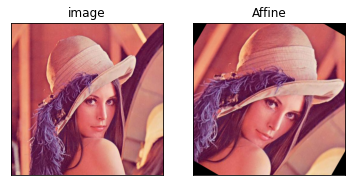

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((rows/2,cols/2), -30, 1.2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Affine')
plt.xticks([])
plt.yticks([])
plt.show()

### cv2.getAffineTransform()

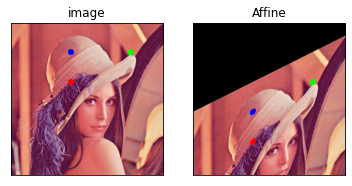

In [32]:
img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Affine')
plt.xticks([])
plt.yticks([])
plt.show()

## 원근법 변환

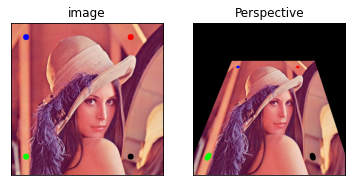

In [34]:
img = cv2.imread('images/lena.jpg')

pts1 = np.float32([[50,50],[50,450],[400,50],[400,450]])
pts2 = np.float32([[150,150],[50,450],[350,150],[400,450]])

cv2.circle(img, (50,50), 10, (255,0,0), -1)
cv2.circle(img, (50,450), 10, (0,255,0), -1)
cv2.circle(img, (400,50), 10, (0,0,255), -1)
cv2.circle(img, (400,450), 10, (0,0,0), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img,M,(512,512))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Perspective')
plt.xticks([])
plt.yticks([])

plt.show()

## 푸리에 변환

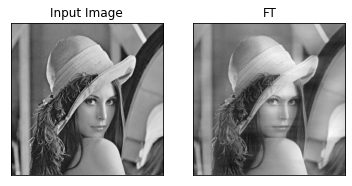

In [57]:
#openCV 활용하기
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift=np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

d=150
mask = np.zeros((rows,cols,2), np.uint8)
mask[crow-d:crow+d,ccol-3:ccol+d] = 1

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('FT')
plt.xticks([])
plt.yticks([])
plt.show()

## 문서 스캔하기

In [36]:
import cv2
import numpy as np
from datetime import datetime
from time import sleep

points = np.zeros((4,2),dtype=np.float32)
count=0

def mouseHandler(event, x, y, flags, param):
    global count
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y),5,(0,0,255),-1)
        cv2.imshow('Capture',img)
        try:
            points[count] = [x,y]
            count += 1
            if count ==4:
                sum_ = points.sum(axis=1)
                diff = np.diff(points, axis=1)
                
                top_left = points[np.argmin(sum_)]
                bottom_right = points[np.argmax(sum_)]
                top_right = points[np.argmin(diff)]
                bottom_left = points[np.argmax(diff)]
                
                pts1 = np.float32([top_left, top_right,
                                  bottom_right, bottom_left])
                width_bottom = abs(bottom_right[0]-bottom_left[0])
                width_top = abs(top_right[0]-top_left[0])
                height_right = abs(top_right[1]-bottom_right[1])
                height_lefpt = abs(top_left[1]-bottom_left[1])
                
                width = int(max([width_bottom, width_top]))
                height=int(max([height_right, height_left]))
                
                pts2 = np.float32([0,0], [width-1,0],
                                 [width-1,height-1],
                                 [0,hegiht-1])
                
                M = cv2.getPerspectiveTransform(pts1, pts2)
                
                dst = cv2.warpPerspective(img, M,(width, height))
                cv2.imshow('Capture',img)
                cv2.imshow('Scanned', dst)
        except Exception as e:
                print(e)
    cap = cv2.VideoCapture(0)
    captrued = False
    
    if cap.isOpened():
        delay = int(1000/ cap.get(cv2.CAP_PROP_FPS))
        while True:
            ret, img = cap.read()
            if ret:
                cv2.imshow('Capture',img)
                key = cv2.waitKey(delay)
                if key & 0xFF ==27:
                    print('아무 작업도 하지 않고 종료함')
                    break
                elif key == ord('c'):
                    captrued = True
                    break
            else:
                print(ret, img)
                break
    else:
        print('File not opened')
        
    if captured:
        cap.release()
        while True:
            cv2.imshow('Capture', img)
            cv2.setMouseCallback('Capture', mouseHandler)
            key = cv2.waitKey(delay)
            if key & 0xFF==27:
                print('ESC Key pressed')
                break
    
    cap.releas()
    cv2.destroyAllWindows()

# 엣지 검출

## 합성곱 함수 구현하기

In [92]:
import numpy as np

def Conv2D(img, kernel=None, padding="valid"):
    if kernel is not None :
        h, w = img.shape[0:2]
        sy, sx = int(len(kernel)/2), int(len(kernel[0])/2)
        if padding=="same":
            new_shape = (h+2*sy, w+2*sx)
            img_out = np.zeros(new_shape, dtype=np.uint8)
        elif padding=="valid":
            img_out = np.zeros(img.shape, dtype=np.uint8)

        height, width = img_out.shape
        for y in range(sy, height-sy):
            for x in range(sx, width-sx):
                roi = img[y-sy:y+sy+1, x-sx:x+sx+1]
                y_, x_ = roi.shape
                filtered = roi * kernel[:y_, :x_]
                pixel_value = np.abs(np.sum(filtered))
                img_out[y, x] = np.uint8(pixel_value)

        return img_out[sy:-sy, sx:-sx]
    else:
        print("Kernel array not found!")

In [ ]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = Conv2D(img, kernel=kernel, padding="same")
cv2.imshow("House", img)
cv2.imshow("Conv2D", output)
cv2.waitKey()
cv2.destroyAllWindows()

## cv2.filter2D()사용하기

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/house.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = cv2.filter2D(img, -1, kernel)

cv2.imshow('House',img)
cv2.imshow('filter2D',output)
cv2.waitKey()
cv2.destroyAllWindows()

## 엣지 검출 필터

### 차분 필터

In [69]:
import numpy as np

def diff_filter(img):
    height, width = img.shape
    img_ =np.zeros(img.shape,dtype=np.uint8)
    for y in range(height-1):
        for x in range(width-1):
            H=1*img[y,x]+ -1*img[y,x+1]
            V=1*img[y,x]+ -1*img[y+1,x]
            img_[y,x] = np.sqrt(H**2+V**2)
    return img_

In [70]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Diff Filter", diff_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [71]:
#filter2D() 함수 이용하기
import cv2
import numpy as np

img = cv2.imread('images/house.jpg', cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,1]])
y_kernel = np.array([[-1],[1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("images/Origin", img)
cv2.imshow("Diff Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Diff Filter", x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 로버츠 필터

In [76]:
import numpy as np

def roverts_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    
    for y in range(1, height-1):
        for x in range(1, width-1):
            H=1*img[y,x] + -1*img[y+1,x]
            V=1*img[y,x+1]+ -1*img[y+1,x]
            img_[y,x] = np.sqrt(H**2+V**2)
    return img_

In [78]:
import cv2
img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Roverts Filter", roverts_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [80]:
import cv2
import numpy as np

img = cv2.imread('images/house.jpg', cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[1,0],[0,-1]])
y_kernel = np.array([[0,1],[-1,0]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("images/Origin", img)
cv2.imshow("Rovert Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Rovert Filter", x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 프리위트 필터

In [81]:
import numpy as np

def prewitt_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]

    for y in range(1, height-1):
        for x in range(1, width-1):
            H = 1*img[y-1,x-1] + 0*img[y-1,x] + -1*img[y-1,x+1] \
            + 1*img[y ,x-1] + 0*img[y ,x] + -1*img[y ,x+1] \
            + 1*img[y+1,x-1] + 0*img[y+1,x] + -1*img[y+1,x+1]
            V = 1*img[y-1,x-1] + 1*img[y-1,x] + 1*img[y-1,x+1] \
            + 0*img[y ,x-1] + 0*img[y ,x] + 0*img[y ,x+1] \
            + -1*img[y+1,x-1] + -1*img[y+1,x] + -1*img[y+1,x+1]
            img_[y,x] = (np.abs(H) + np.abs(V))/2

    return img_

In [83]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Prewitt Filter", prewitt_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [85]:
import cv2
import numpy as np

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
y_kernel = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("Origin", img)
cv2.imshow("Diff Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Diff Filter", x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 소벨 필터

In [86]:
import numpy as np

def sobel_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]

    for y in range(1, height-1):
        for x in range(1, width-1):
            H = 1*img[y-1, x-1] + 0*img[y-1, x] + -1*img[y-1, x+1] \
                + 2*img[y , x-1] + 0*img[y , x] + -2*img[y , x+1] \
                + 1*img[y+1, x-1] + 0*img[y+1, x] + -1*img[y+1, x+1]
            V = 1*img[y-1, x-1] + 2*img[y-1, x] + 1*img[y-1, x+1] \
                + 0*img[y , x-1] + 0*img[y , x] + 0*img[y , x+1] \
                + -1*img[y+1, x-1] + -2*img[y+1, x] + -1*img[y+1, x+1]
            img_[y,x] = (np.abs(H) + np.abs(V))/2

    return img_

In [87]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Sobel Filter", sobel_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [88]:
import cv2
import numpy as np

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_edge = cv2.Sobel(img, -1, 1, 0, ksize=3)
y_edge = cv2.Sobel(img, -1, 0, 1, ksize=3)

cv2.imshow("Origin", img)
cv2.imshow("Sobel Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Sobel Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 라플라시안 필터

In [89]:
import numpy as np

def laplacian_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]

    for y in range(1, height-1):
        for x in range(1, width-1):
            T = 0*img[y-1, x-1] + -1*img[y-1, x] + 0*img[y-1, x+1] \
             + -1*img[y , x-1] + 4*img[y , x] + -1*img[y , x+1] \
             + 0*img[y+1, x-1] + -1*img[y+1, x] + 0*img[y+1, x+1]
            img_[y,x] = np.abs(T)

    return img_

In [90]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Laplacian Filter", laplacian_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [94]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)

filter = [[0,1,0],[1,-4,1],[0,1,0]]
mask = np.array(filter)
output = Conv2D(img, kernel=mask)
# cv2.Laplacian(img, cv2.CV_64F) # 5,6,7라인 대신 사용 가능

cv2.imshow("House", img)
cv2.imshow("Laplacian Filter", output)
cv2.waitKey()
cv2.destroyAllWindows()

In [95]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Origin", img)
cv2.imshow("cv2.Laplacian", cv2.Laplacian(img, -1))
cv2.waitKey()
cv2.destroyAllWindows()

## 엣지 추출 비교

In [99]:
def two_tone(img, threshold=128):
    output = (img > threshold) * 255
    return output.astype(np.uint8)

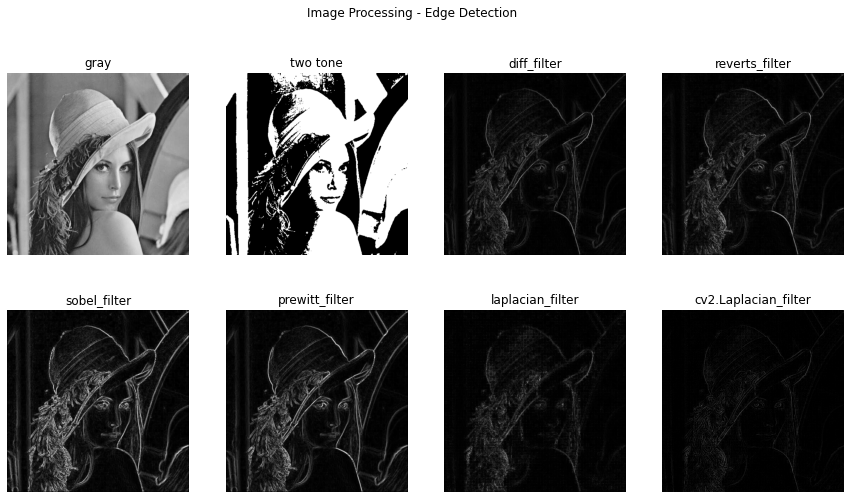

In [100]:
import cv2

lena_gray = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

A = diff_filter(lena_gray)
B = roverts_filter(lena_gray)
C = sobel_filter(lena_gray)
D = prewitt_filter(lena_gray)
E = laplacian_filter(lena_gray)
F = cv2.Laplacian(lena_gray, cv2.CV_8U)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize=(15,8))
fig.suptitle("Image Processing - Edge Detection")
axes[0,0].imshow(lena_gray, cmap="gray")
axes[0,0].axis("off"); axes[0,0].set_title("gray")
axes[0,1].imshow(two_tone(lena_gray), cmap="gray")
axes[0,1].axis("off"); axes[0,1].set_title("two tone")
axes[0,2].imshow(A, cmap="gray")
axes[0,2].axis("off"); axes[0,2].set_title("diff_filter")
axes[0,3].imshow(B, cmap="gray")
axes[0,3].axis("off"); axes[0,3].set_title("reverts_filter")

axes[1,0].imshow(C, cmap="gray")
axes[1,0].axis("off"); axes[1,0].set_title("sobel_filter")
axes[1,1].imshow(D, cmap="gray")
axes[1,1].axis("off"); axes[1,1].set_title("prewitt_filter")
axes[1,2].imshow(E, cmap="gray")
axes[1,2].axis("off")
axes[1,2].set_title("laplacian_filter")
axes[1,3].imshow(F, cmap="gray")
axes[1,3].axis("off")
axes[1,3].set_title("cv2.Laplacian_filter")
plt.show()

## 캐니 엣지

In [101]:
import cv2

img = cv2.imread('images/house.jpg', cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 150, 200)
cv2.imshow('Canny Edge', output)
cv2.waitKey()
cv2.destroyAllWindows()

In [105]:
#트랙바 사용해서 min, max 조절해보기
def onChange(x):
    low = cv2.getTrackbarPos("Low", "Edge Detection")
    high = cv2.getTrackbarPos("High", "Edge Detection")
    if low > high:
        pass # Low threshold must be low than high threshold
    else:
        canny = cv2.Canny(img, low, high)
        cv2.imshow("Edge Detection", canny)

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.namedWindow("Edge Detection")
cv2.createTrackbar("Low", "Edge Detection", 0, 255, onChange)
cv2.createTrackbar("High", "Edge Detection", 0, 255, onChange)

cv2.imshow("Edge Detection", img)
cv2.waitKey()
cv2.destroyAllWindows()
